In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [254]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


**S09 T02**

<u>*Exercice 1*<u>

*Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.*

Regression analysis is a predictive modelling technique that analyzes the relation between the target or dependent variable and independent variable in a dataset. It involves determining the best fit line, which is a line that passes through all the data points in such a way that distance of the line from each data point is minimized.

First, we import the already preprocessed and sampled dataframe from the previous task S09 T01, but without the dummies columns and the interpolation of "TaxiIn".

In [142]:
delayed_flights_preprocessed = pd.read_csv(r'C:\Users\Cristina\OneDrive\Documentos\Curs DS IT Academy\s09t02\delayed_flights_preprocessed(no dummies).csv')
delayed_flights_preprocessed

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AirTime,DepDelay,TaxiIn,TaxiOut
0,0.000000,20,1.000000,0.675281,1538,1658.0,1620,9E,2956,87839E,97.0,102.0,38.0,DTW,CID,431,0,N,0,38.0,0.0,0.0,0.0,0.0,-0.177215,0.463415,0.00,0.090909
1,1.000000,25,0.500000,0.606086,1408,1612.0,1533,9E,2932,89709E,77.0,85.0,39.0,DTW,AVP,398,0,N,0,39.0,0.0,0.0,0.0,0.0,-0.493671,0.560976,-1.00,0.909091
2,1.000000,17,0.333333,0.513130,1209,1342.0,1301,9E,2960,87949E,130.0,112.0,41.0,DTW,STL,440,0,N,0,0.0,0.0,18.0,0.0,23.0,0.037975,-0.024390,0.25,1.454545
3,0.454545,13,0.666667,0.732805,1705,2103.0,2029,9E,2981,89729E,124.0,144.0,34.0,JAN,DTW,777,0,N,0,0.0,0.0,0.0,0.0,34.0,0.202532,0.731707,1.25,-0.636364
4,1.000000,10,0.333333,0.438099,1020,1156.0,1140,9E,2474,80309E,64.0,80.0,16.0,MSP,OMA,282,0,N,0,16.0,0.0,0.0,0.0,0.0,-0.556962,0.195122,-1.00,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387348,0.272727,13,1.000000,0.673197,1610,1759.0,1805,YV,7240,N454YV,103.0,115.0,-6.0,JAC,DEN,406,0,N,0,0.0,0.0,0.0,0.0,0.0,-0.025316,-0.439024,0.25,-0.545455
387349,0.090909,17,1.000000,0.804919,1835,2035.0,2001,YV,7136,N521LR,183.0,206.0,34.0,ATL,DEN,1199,0,N,0,0.0,0.0,0.0,0.0,34.0,0.898734,0.804878,0.50,0.000000
387350,0.090909,13,0.333333,0.685286,1601,2020.0,1930,YV,2884,N911FJ,155.0,149.0,50.0,PHX,IAH,1009,0,N,0,50.0,0.0,0.0,0.0,0.0,0.518987,0.487805,0.50,0.181818
387351,0.545455,15,0.166667,0.479366,1052,1452.0,1407,YV,7046,N522LR,121.0,135.0,45.0,ORD,PWM,900,0,N,0,45.0,0.0,0.0,0.0,0.0,0.151899,0.853659,-0.75,0.181818


Since we are predicting the arrival delay, we drop the unnecessary columns of the dataframe such as 'Cancelled', 'CancellationCode', 'Diverted', 'FlightNum', 'TailNum' because they don't affect the arrival delay at all. For Cancelled and Diverted, first we delete the rows == 1 because they are the cancelled and diverted flights and then the entire columns.

In [143]:
delayed_flights_preprocessed.drop(['CancellationCode', 'FlightNum', 'TailNum'], axis=1, inplace=True)
delayed_flights_preprocessed

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AirTime,DepDelay,TaxiIn,TaxiOut
0,0.000000,20,1.000000,0.675281,1538,1658.0,1620,9E,97.0,102.0,38.0,DTW,CID,431,0,0,38.0,0.0,0.0,0.0,0.0,-0.177215,0.463415,0.00,0.090909
1,1.000000,25,0.500000,0.606086,1408,1612.0,1533,9E,77.0,85.0,39.0,DTW,AVP,398,0,0,39.0,0.0,0.0,0.0,0.0,-0.493671,0.560976,-1.00,0.909091
2,1.000000,17,0.333333,0.513130,1209,1342.0,1301,9E,130.0,112.0,41.0,DTW,STL,440,0,0,0.0,0.0,18.0,0.0,23.0,0.037975,-0.024390,0.25,1.454545
3,0.454545,13,0.666667,0.732805,1705,2103.0,2029,9E,124.0,144.0,34.0,JAN,DTW,777,0,0,0.0,0.0,0.0,0.0,34.0,0.202532,0.731707,1.25,-0.636364
4,1.000000,10,0.333333,0.438099,1020,1156.0,1140,9E,64.0,80.0,16.0,MSP,OMA,282,0,0,16.0,0.0,0.0,0.0,0.0,-0.556962,0.195122,-1.00,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387348,0.272727,13,1.000000,0.673197,1610,1759.0,1805,YV,103.0,115.0,-6.0,JAC,DEN,406,0,0,0.0,0.0,0.0,0.0,0.0,-0.025316,-0.439024,0.25,-0.545455
387349,0.090909,17,1.000000,0.804919,1835,2035.0,2001,YV,183.0,206.0,34.0,ATL,DEN,1199,0,0,0.0,0.0,0.0,0.0,34.0,0.898734,0.804878,0.50,0.000000
387350,0.090909,13,0.333333,0.685286,1601,2020.0,1930,YV,155.0,149.0,50.0,PHX,IAH,1009,0,0,50.0,0.0,0.0,0.0,0.0,0.518987,0.487805,0.50,0.181818
387351,0.545455,15,0.166667,0.479366,1052,1452.0,1407,YV,121.0,135.0,45.0,ORD,PWM,900,0,0,45.0,0.0,0.0,0.0,0.0,0.151899,0.853659,-0.75,0.181818


In [144]:
delayed_flights_preprocessed.drop(delayed_flights_preprocessed[(delayed_flights_preprocessed['Cancelled'] == 1) | (delayed_flights_preprocessed['Diverted'] == 1)].index, inplace = True)
delayed_flights_preprocessed

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AirTime,DepDelay,TaxiIn,TaxiOut
0,0.000000,20,1.000000,0.675281,1538,1658.0,1620,9E,97.0,102.0,38.0,DTW,CID,431,0,0,38.0,0.0,0.0,0.0,0.0,-0.177215,0.463415,0.00,0.090909
1,1.000000,25,0.500000,0.606086,1408,1612.0,1533,9E,77.0,85.0,39.0,DTW,AVP,398,0,0,39.0,0.0,0.0,0.0,0.0,-0.493671,0.560976,-1.00,0.909091
2,1.000000,17,0.333333,0.513130,1209,1342.0,1301,9E,130.0,112.0,41.0,DTW,STL,440,0,0,0.0,0.0,18.0,0.0,23.0,0.037975,-0.024390,0.25,1.454545
3,0.454545,13,0.666667,0.732805,1705,2103.0,2029,9E,124.0,144.0,34.0,JAN,DTW,777,0,0,0.0,0.0,0.0,0.0,34.0,0.202532,0.731707,1.25,-0.636364
4,1.000000,10,0.333333,0.438099,1020,1156.0,1140,9E,64.0,80.0,16.0,MSP,OMA,282,0,0,16.0,0.0,0.0,0.0,0.0,-0.556962,0.195122,-1.00,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387348,0.272727,13,1.000000,0.673197,1610,1759.0,1805,YV,103.0,115.0,-6.0,JAC,DEN,406,0,0,0.0,0.0,0.0,0.0,0.0,-0.025316,-0.439024,0.25,-0.545455
387349,0.090909,17,1.000000,0.804919,1835,2035.0,2001,YV,183.0,206.0,34.0,ATL,DEN,1199,0,0,0.0,0.0,0.0,0.0,34.0,0.898734,0.804878,0.50,0.000000
387350,0.090909,13,0.333333,0.685286,1601,2020.0,1930,YV,155.0,149.0,50.0,PHX,IAH,1009,0,0,50.0,0.0,0.0,0.0,0.0,0.518987,0.487805,0.50,0.181818
387351,0.545455,15,0.166667,0.479366,1052,1452.0,1407,YV,121.0,135.0,45.0,ORD,PWM,900,0,0,45.0,0.0,0.0,0.0,0.0,0.151899,0.853659,-0.75,0.181818


In [145]:
delayed_flights_preprocessed.drop(['Cancelled', 'Diverted'], axis=1, inplace=True)
delayed_flights_preprocessed

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AirTime,DepDelay,TaxiIn,TaxiOut
0,0.000000,20,1.000000,0.675281,1538,1658.0,1620,9E,97.0,102.0,38.0,DTW,CID,431,38.0,0.0,0.0,0.0,0.0,-0.177215,0.463415,0.00,0.090909
1,1.000000,25,0.500000,0.606086,1408,1612.0,1533,9E,77.0,85.0,39.0,DTW,AVP,398,39.0,0.0,0.0,0.0,0.0,-0.493671,0.560976,-1.00,0.909091
2,1.000000,17,0.333333,0.513130,1209,1342.0,1301,9E,130.0,112.0,41.0,DTW,STL,440,0.0,0.0,18.0,0.0,23.0,0.037975,-0.024390,0.25,1.454545
3,0.454545,13,0.666667,0.732805,1705,2103.0,2029,9E,124.0,144.0,34.0,JAN,DTW,777,0.0,0.0,0.0,0.0,34.0,0.202532,0.731707,1.25,-0.636364
4,1.000000,10,0.333333,0.438099,1020,1156.0,1140,9E,64.0,80.0,16.0,MSP,OMA,282,16.0,0.0,0.0,0.0,0.0,-0.556962,0.195122,-1.00,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387348,0.272727,13,1.000000,0.673197,1610,1759.0,1805,YV,103.0,115.0,-6.0,JAC,DEN,406,0.0,0.0,0.0,0.0,0.0,-0.025316,-0.439024,0.25,-0.545455
387349,0.090909,17,1.000000,0.804919,1835,2035.0,2001,YV,183.0,206.0,34.0,ATL,DEN,1199,0.0,0.0,0.0,0.0,34.0,0.898734,0.804878,0.50,0.000000
387350,0.090909,13,0.333333,0.685286,1601,2020.0,1930,YV,155.0,149.0,50.0,PHX,IAH,1009,50.0,0.0,0.0,0.0,0.0,0.518987,0.487805,0.50,0.181818
387351,0.545455,15,0.166667,0.479366,1052,1452.0,1407,YV,121.0,135.0,45.0,ORD,PWM,900,45.0,0.0,0.0,0.0,0.0,0.151899,0.853659,-0.75,0.181818


In [146]:
delayed_flights_preprocessed.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
ArrDelay             0
Origin               0
Dest                 0
Distance             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
AirTime              0
DepDelay             0
TaxiIn               0
TaxiOut              0
dtype: int64

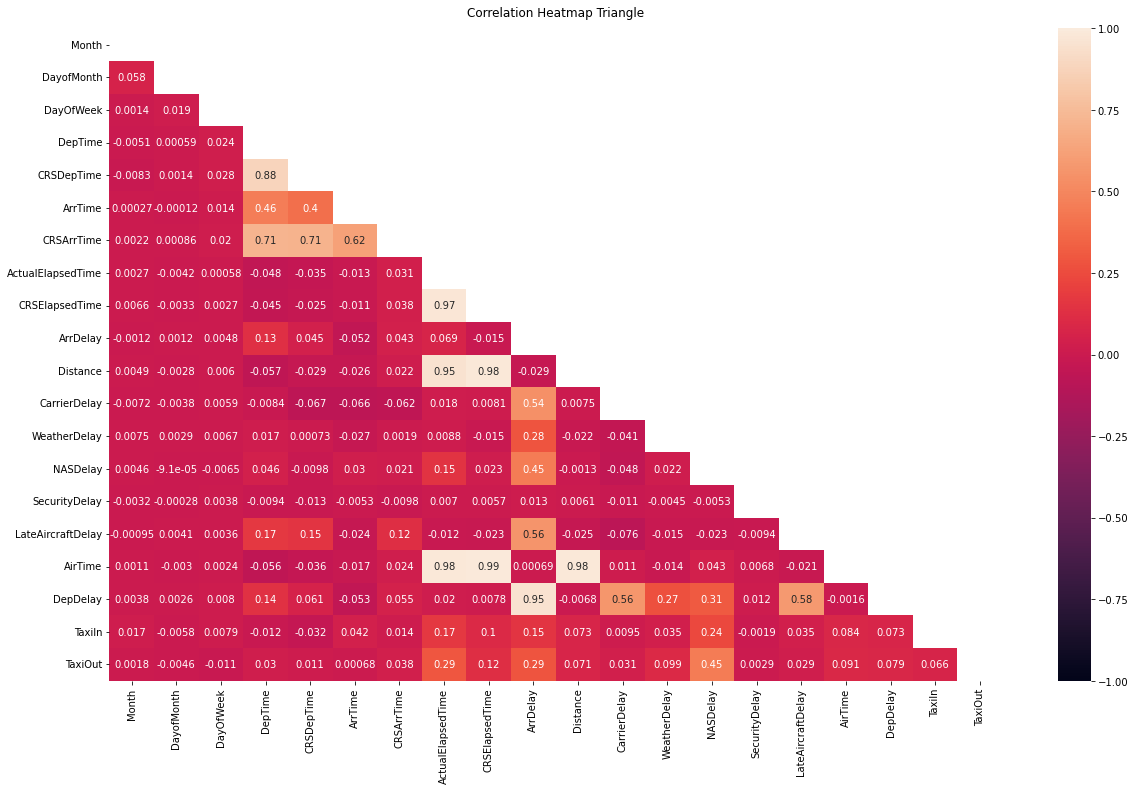

In [147]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 12))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(delayed_flights_preprocessed.corr(), vmin=-1, vmax=1, annot=True, mask= np.triu(delayed_flights_preprocessed.corr()))
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap Triangle', fontdict={'fontsize':12}, pad=12);

Taking a look at the correlation heatmap, we can see that ArrDelay is strongly correlated to DepDelay, of course. The correlation with the other features is weaker. 

We will take 3 different groups of independent variables:

1.DepDelay


2.DepDelay, TaxiIn and TaxiOut


3.Month, DayOfWeek, DepTime, ActualElapsedTime, Distance, AirTime, DepDelay, TaxiIn, TaxiOut

In [8]:
#choose dependent (or target) variable 
y = delayed_flights_preprocessed['ArrDelay']
#choose independent variable 
X = delayed_flights_preprocessed['DepDelay']

In [9]:
#since the input has only 1 dimension, (1 feature), we reshape first
X = X.values.reshape(-1, 1)
X.shape

(385670, 1)

In [10]:
#choose dependent (or target) variable 
y2 = delayed_flights_preprocessed['ArrDelay']
#choose independent variable 
X2 = delayed_flights_preprocessed[['Month','DayOfWeek','DepTime','ActualElapsedTime','Distance','AirTime','DepDelay','TaxiIn','TaxiOut']]

In [11]:
#choose dependent (or target) variable 
y3 = delayed_flights_preprocessed['ArrDelay']
#choose independent variable 
X3 = delayed_flights_preprocessed[['DepDelay', 'TaxiIn', 'TaxiOut']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [14]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

<u>**Linear Regression**<u>

The linear regression model consists of a predictor variable and a dependent variable related linearly to each other. 

<u>DepDelay<u>

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'ArrDelay')

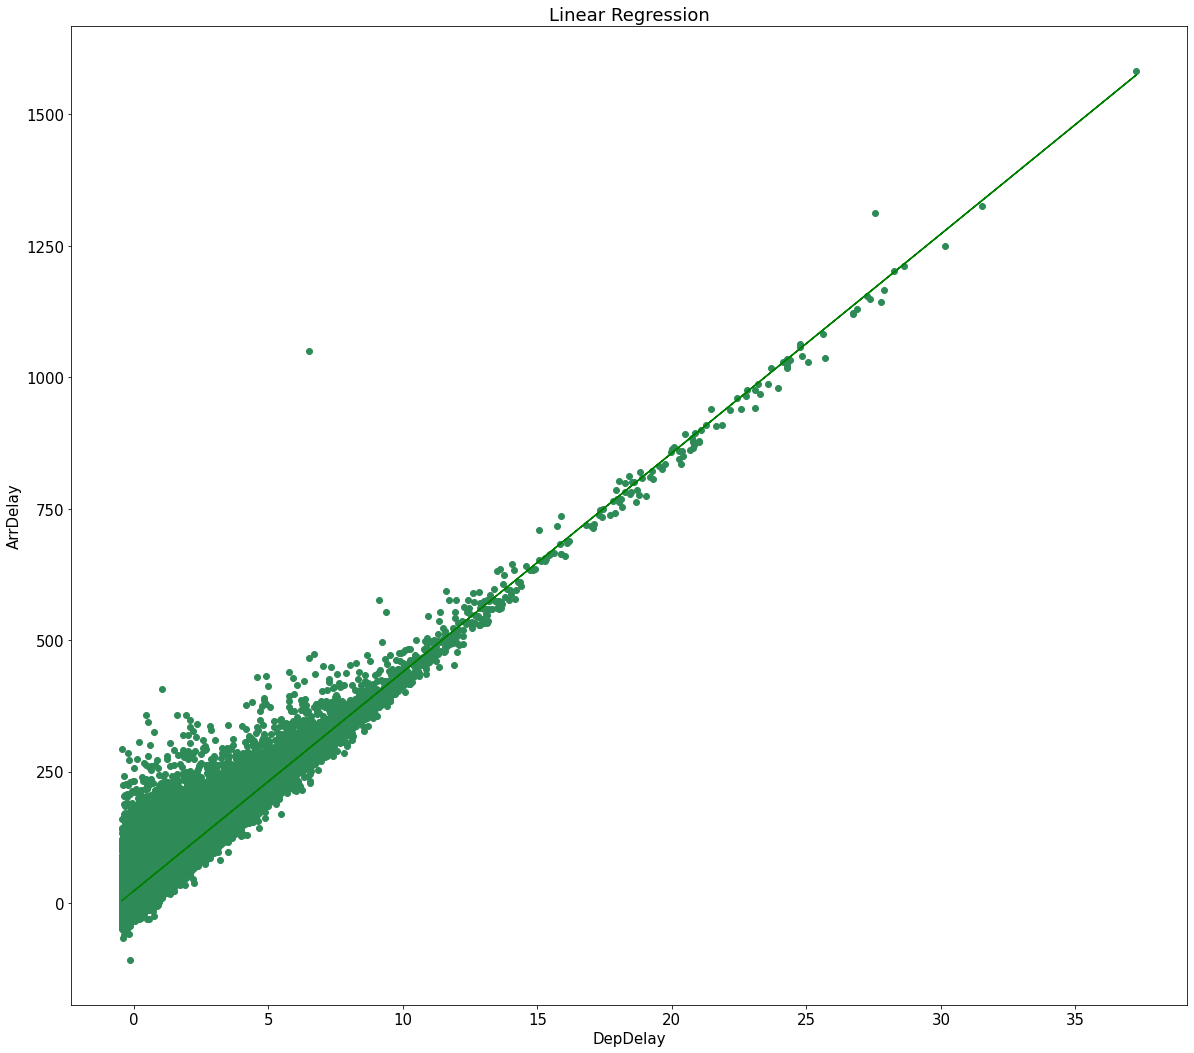

In [16]:
plt.rcParams.update({'font.size': 15, 'figure.figsize': (20, 18)})
plt.scatter(X_train, y_train, color = 'seagreen')
plt.plot(X_train, lin_reg.predict(X_train), color = 'green')
plt.title('Linear Regression')
plt.xlabel('DepDelay')
plt.ylabel('ArrDelay')

In [17]:
y_pred = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

The **mean squared error (MSE)** tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

In [18]:
mse_lin = mean_squared_error(y_train, y_pred)
print("Mean squared error of the linear regression model train subset:", mse_lin)

Mean squared error of the linear regression model train subset: 298.51468219164934


In [19]:
mse2_lin = mean_squared_error(y_test, y_pred_test)
print("Mean squared error of the linear regression model test subset:", mse2_lin)

Mean squared error of the linear regression model test subset: 294.6012149102423


The **R2 score** is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset. Simply put, it is the difference between the samples in the dataset and the predictions made by the model.

In [20]:
r2_lin = r2_score(y_train, y_pred)
print("R2 score of the linear regression model train subset:", r2_lin)

R2 score of the linear regression model train subset: 0.9075922695083661


In [21]:
r22_lin = r2_score(y_test, y_pred_test)
print("R2 score of the linear regression model test subset:", r22_lin)

R2 score of the linear regression model test subset: 0.9088171634433312


The **Root Mean Square Error (RMSE)** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in regression analysis to verify experimental results.

In [22]:
rmse_lin = np.sqrt(mse_lin)

print("Root Mean Squared Error of the linear regression model train subset: {}".format(rmse_lin))

Root Mean Squared Error of the linear regression model train subset: 17.277577439897335


In [23]:
rmse2_lin = np.sqrt(mse2_lin)

print("Root Mean Squared Error of the linear regression model test subset: {}".format(rmse2_lin))

Root Mean Squared Error of the linear regression model test subset: 17.163951028543583


<u> Month, DayOfWeek, DepTime, ActualElapsedTime, Distance, AirTime, DepDelay, TaxiIn, TaxiOut <u>

In [24]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2_train, y2_train)

LinearRegression()

In [25]:
y_pred2 = lin_reg2.predict(X2_train)
y_pred2_test = lin_reg2.predict(X2_test)

In [26]:
mse_lin2 = mean_squared_error(y2_train, y_pred2)
print("Mean squared error of the linear regression model train subset:", mse_lin2)

Mean squared error of the linear regression model train subset: 99.02733014933678


In [27]:
mse2_lin2 = mean_squared_error(y2_test, y_pred2_test)
print("Mean squared error of the linear regression model test subset:", mse2_lin2)

Mean squared error of the linear regression model test subset: 98.06195710984709


In [28]:
r2_lin2 = r2_score(y2_train, y_pred2)
print("R2 score of the linear regression model train subset:", r2_lin2)

R2 score of the linear regression model train subset: 0.9693452570956929


In [29]:
r22_lin2 = r2_score(y2_test, y_pred2_test)
print("R2 score of the linear regression model test subset:", r22_lin2)

R2 score of the linear regression model test subset: 0.9696485725277864


In [30]:
rmse_lin2 = np.sqrt(mse_lin2)

print("Root Mean Squared Error of the linear regression model train subset: {}".format(rmse_lin2))

Root Mean Squared Error of the linear regression model train subset: 9.951247667972934


In [31]:
rmse2_lin2 = np.sqrt(mse2_lin2)

print("Root Mean Squared Error of the linear regression model test subset: {}".format(rmse2_lin2))

Root Mean Squared Error of the linear regression model test subset: 9.902623748777245


<u> DepTime, TaxiIn, TaxiOut <u>

In [32]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X3_train, y3_train)

LinearRegression()

In [33]:
y_pred3 = lin_reg3.predict(X3_train)
y_pred3_test = lin_reg3.predict(X3_test)

In [34]:
mse_lin3 = mean_squared_error(y3_train, y_pred3)
print("Mean squared error of the linear regression model train subset:", mse_lin3)

Mean squared error of the linear regression model train subset: 136.84551462146166


In [35]:
mse2_lin3 = mean_squared_error(y3_test, y_pred3_test)
print("Mean squared error of the linear regression model test subset:", mse2_lin3)

Mean squared error of the linear regression model test subset: 133.04244424806348


In [36]:
r2_lin3 = r2_score(y3_train, y_pred3)
print("R2 score of the linear regression model train subset:", r2_lin3)

R2 score of the linear regression model train subset: 0.9576383200273868


In [37]:
r22_lin3 = r2_score(y3_test, y_pred3_test)
print("R2 score of the linear regression model test subset:", r22_lin3)

R2 score of the linear regression model test subset: 0.9588216652376435


In [38]:
rmse_lin3 = np.sqrt(mse_lin3)

print("Root Mean Squared Error of the linear regression model train subset: {}".format(rmse_lin3))

Root Mean Squared Error of the linear regression model train subset: 11.6980987609723


In [39]:
rmse2_lin3 = np.sqrt(mse2_lin3)

print("Root Mean Squared Error of the linear regression model test subset: {}".format(rmse2_lin3))

Root Mean Squared Error of the linear regression model test subset: 11.534402639411521


<u>**Random forest Regression**<u>

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

Trees run in parallel with no interaction amongst them. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

<u>DepDelay<u>

In [ ]:
#rf_reg = RandomForestRegressor(n_estimators=10,random_state=0)
#rf_reg.fit(X_train, y_train)

In [76]:
#y2_pred = rf_reg.predict(X_train)

In [80]:
#mse_rf = mean_squared_error(y2_train, y2_pred)
#print("Mean squared error of the linear regression model train subset:", mse_rf)

In [81]:
#r2_rf = r2_score(y2_train, y2_pred)
#print("R2 score of the linear regression model train subset:", r2_rf)

<u> Month, DayOfWeek, DepTime, ActualElapsedTime, Distance, AirTime, DepDelay, TaxiIn, TaxiOut <u>

In [40]:
rf_reg2 = RandomForestRegressor(n_estimators=10,random_state=0)
rf_reg2.fit(X2_train, y2_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [41]:
y2_pred2 = rf_reg2.predict(X2_train)
y2_pred2_test = rf_reg2.predict(X2_test)

In [42]:
mse_rf2 = mean_squared_error(y2_train, y2_pred2)
print("Mean squared error of the random forest regression model train subset:", mse_rf2)

Mean squared error of the random forest regression model train subset: 19.983541554771104


In [43]:
mse2_rf2 = mean_squared_error(y2_test, y2_pred2_test)
print("Mean squared error of the random forest regression model test subset:", mse2_rf2)

Mean squared error of the random forest regression model test subset: 117.99575414214226


In [44]:
r2_rf2 = r2_score(y2_train, y2_pred2)
print("R2 score of the random forest regression model train subset:", r2_rf2)

R2 score of the random forest regression model train subset: 0.9938139266427234


In [45]:
r22_rf2 = r2_score(y2_test, y2_pred2_test)
print("R2 score of the random forest regression model test subset:", r22_rf2)

R2 score of the random forest regression model test subset: 0.9634788078942516


In [46]:
rmse_rf2 = np.sqrt(mse_rf2)

print("Root Mean Squared Error of the random forest regression model train subset: {}".format(rmse_rf2))

Root Mean Squared Error of the random forest regression model train subset: 4.47029546616005


In [47]:
rmse2_rf2 = np.sqrt(mse2_rf2)

print("Root Mean Squared Error of the random forest regression model test subset: {}".format(rmse2_rf2))

Root Mean Squared Error of the random forest regression model test subset: 10.862585057993437


<u> DepTime, TaxiIn, TaxiOut <u>

In [48]:
rf_reg3 = RandomForestRegressor(n_estimators=10,random_state=0)
rf_reg3.fit(X3_train, y3_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [49]:
y2_pred3 = rf_reg3.predict(X3_train)
y2_pred3_test = rf_reg3.predict(X3_test)

In [50]:
mse_rf3 = mean_squared_error(y3_train, y2_pred3)
print("Mean squared error of the random forest regression model train subset:", mse_rf3)

Mean squared error of the random forest regression model train subset: 90.8363952766022


In [51]:
mse3_rf3 = mean_squared_error(y3_test, y2_pred3_test)
print("Mean squared error of the random forest regression model train subset:", mse3_rf3)

Mean squared error of the random forest regression model train subset: 165.69196652255374


In [52]:
r2_rf3 = r2_score(y3_train, y2_pred3)
print("R2 score of the random forest regression model train subset:", r2_rf3)

R2 score of the random forest regression model train subset: 0.9718808298743484


In [53]:
r23_rf3 = r2_score(y3_test, y2_pred3_test)
print("R2 score of the random forest regression model test subset:", r23_rf3)

R2 score of the random forest regression model test subset: 0.9487162213272536


In [54]:
rmse_rf3 = np.sqrt(mse_rf3)

print("Root Mean Squared Error of the random forest regression model train subset: {}".format(rmse_rf3))

Root Mean Squared Error of the random forest regression model train subset: 9.530812938915663


In [55]:
rmse2_rf3 = np.sqrt(mse3_rf3)

print("Root Mean Squared Error of the random forest regression model test subset: {}".format(rmse2_rf3))

Root Mean Squared Error of the random forest regression model test subset: 12.872139158762764


<u>**Lasso Regression**<u>

Lasso regression (least absolute shrinkage and selection operator) performs variable selection that aims to increase prediction accuracy by identifying a simpler model. It is similar to Ridge regression but with variable selection.

Ridge regression allows you to analyze data even when severe multicollinearity is present and helps prevent overfitting. This type of model reduces the large, problematic variance that multicollinearity causes by introducing a slight bias in the estimates. The procedure trades away much of the variance in exchange for a little bias, which produces more useful coefficient estimates when multicollinearity is present.

<u>DepDelay<u>

In [56]:
#Create an instance of Lasso Regression implementation
lr_reg = Lasso(alpha=1.0)
#Fit the Lasso model
lr_reg.fit(X_train, y_train)

Lasso()

In [57]:
y3_pred = lr_reg.predict(X_train)
y3_pred_test = lr_reg.predict(X_test)

In [58]:
mse_lsr = mean_squared_error(y_train, y3_pred)
print("Mean squared error of the lasso regression model train subset:", mse_lsr)

Mean squared error of the lasso regression model train subset: 299.1066352573687


In [59]:
mse3_lsr = mean_squared_error(y_test, y3_pred_test)
print("Mean squared error of the lasso regression model test subset:", mse3_lsr)

Mean squared error of the lasso regression model test subset: 295.17451986124513


In [60]:
r2_lsr = r2_score(y_train, y3_pred)
print("R2 score of the lasso regression model train subset:", r2_lsr)

R2 score of the lasso regression model train subset: 0.9074090254583278


In [61]:
r23_lsr = r2_score(y_test, y3_pred_test)
print("R2 score of the lasso regression model test subset:", r23_lsr)

R2 score of the lasso regression model test subset: 0.908639718242841


In [62]:
rmse_lsr = np.sqrt(mse_lsr)

print("Root Mean Squared Error of the lasso regression model train subset: {}".format(rmse_lsr))

Root Mean Squared Error of the lasso regression model train subset: 17.294699629001038


In [63]:
rmse2_lsr = np.sqrt(mse3_lsr)

print("Root Mean Squared Error of the lasso regression model test subset: {}".format(rmse2_lsr))

Root Mean Squared Error of the lasso regression model test subset: 17.18064375572828


In [64]:
print("Number of features used: {}".format(np.sum(lr_reg.coef_ != 0)))

Number of features used: 1


<u> Month, DayOfWeek, DepTime, ActualElapsedTime, Distance, AirTime, DepDelay, TaxiIn, TaxiOut <u>

In [65]:
#Create an instance of Lasso Regression implementation
lr_reg2 = Lasso(alpha=1.0)
#Fit the Lasso model
lr_reg2.fit(X2_train, y2_train)

Lasso()

In [66]:
y3_pred2 = lr_reg2.predict(X2_train)
y3_pred2_test = lr_reg2.predict(X2_test)

In [67]:
mse_lsr2 = mean_squared_error(y2_train, y3_pred2)
print("Mean squared error of the lasso regression model train subset:", mse_lsr2)

Mean squared error of the lasso regression model train subset: 102.37758889366891


In [68]:
mse2_lsr2 = mean_squared_error(y2_test, y3_pred2_test)
print("Mean squared error of the lasso regression model test subset:", mse2_lsr2)

Mean squared error of the lasso regression model test subset: 101.78683273072879


In [69]:
r2_lsr2 = r2_score(y2_train, y3_pred2)
print("R2 score of the lasso regression model train subset:", r2_lsr2)

R2 score of the lasso regression model train subset: 0.968308156324466


In [206]:
r22_lsr2 = r2_score(y2_test, y3_pred2_test)
print("R2 score of the lasso regression model test subset:", r22_lsr2)

R2 score of the lasso regression model test subset: 0.9684956759756242


In [71]:
rmse_lsr2 = np.sqrt(mse_lsr2)

print("Root Mean Squared Error of the lasso regression model train subset: {}".format(rmse_lsr2))

Root Mean Squared Error of the lasso regression model train subset: 10.118181105992763


In [72]:
rmse2_lsr2 = np.sqrt(mse2_lsr2)

print("Root Mean Squared Error of the lasso regression model test subset: {}".format(rmse2_lsr2))

Root Mean Squared Error of the lasso regression model test subset: 10.088946066400037


In [73]:
print("Number of features used: {}".format(np.sum(lr_reg2.coef_ != 0)))

Number of features used: 5


<u> DepTime, TaxiIn, TaxiOut <u>

In [74]:
#Create an instance of Lasso Regression implementation
lr_reg3 = Lasso(alpha=1.0)
#Fit the Lasso model
lr_reg3.fit(X3_train, y3_train)

Lasso()

In [75]:
y3_pred3 = lr_reg3.predict(X3_train)
y3_pred3_test = lr_reg3.predict(X3_test)

In [76]:
mse_lsr3 = mean_squared_error(y3_train, y3_pred3)
print("Mean squared error of the lasso regression model train subset:", mse_lsr3)

Mean squared error of the lasso regression model train subset: 138.3806934835688


In [77]:
mse3_lsr3 = mean_squared_error(y3_test, y3_pred3_test)
print("Mean squared error of the lasso regression model test subset:", mse3_lsr3)

Mean squared error of the lasso regression model test subset: 134.5683047214335


In [78]:
r2_lsr3 = r2_score(y3_train, y3_pred3)
print("R2 score of the lasso regression model train subset:", r2_lsr)

R2 score of the lasso regression model train subset: 0.9074090254583278


In [79]:
r23_lsr3 = r2_score(y3_test, y3_pred3_test)
print("R2 score of the lasso regression model test subset:", r2_lsr)

R2 score of the lasso regression model test subset: 0.9074090254583278


In [80]:
rmse_lsr3 = np.sqrt(mse_lsr3)

print("Root Mean Squared Error of the lasso regression model train subset: {}".format(rmse_lsr3))

Root Mean Squared Error of the lasso regression model train subset: 11.76353235569864


In [81]:
rmse3_lsr3 = np.sqrt(mse3_lsr3)

print("Root Mean Squared Error of the lasso regression model test subset: {}".format(rmse3_lsr3))

Root Mean Squared Error of the lasso regression model test subset: 11.600357956607782


In [82]:
print("Number of features used: {}".format(np.sum(lr_reg3.coef_ != 0)))

Number of features used: 3


<u>*Exercice 2*<u>

*Compara’ls en base al MSE i al R2*

In [121]:
data={'Model':['Linear Regression 1', 'Linear Regression 2', 'Linear Regression 3', 'Random Forest Regression 2', 
               'Random Forest Regression 3', 'Lasso Regression 1', 'Lasso Regression 2','Lasso Regression 3' ], 
      'Type':['LR1', 'LR2', 'LR3', 'RF2', 'RF3', 'LSR1', 'LSR2', 'LSR3'], 
      'MSE_train':[mse_lin, mse_lin2, mse_lin3, mse_rf2, mse_rf3, mse_lsr, mse_lsr2, mse_lsr3], 
      'R2_train':[r2_lin, r2_lin2, r2_lin3, r2_rf2, r2_rf3, r2_lsr, r2_lsr2, r2_lsr3], 
      'RMSE_train':[rmse_lin, rmse_lin2, rmse_lin3, rmse_rf2, rmse_rf3, rmse_lsr, rmse_lsr2, rmse_lsr3], 
      'MSE_test':[mse2_lin, mse2_lin2, mse2_lin3, mse2_rf2, mse3_rf3, mse_lsr, mse_lsr2, mse_lsr3], 
      'R2_test':[r22_lin, r22_lin2, r22_lin3, r22_rf2, r23_rf3, r23_lsr, r22_lsr2,r23_lsr3], 
      'RMSE_test':[rmse2_lin, rmse2_lin2, rmse2_lin3, rmse2_rf2, rmse2_rf3, rmse2_lsr, rmse2_lsr2, rmse3_lsr3],}
reg_metrics=pd.DataFrame(data)
reg_metrics

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 1,LR1,298.514682,0.907592,17.277577,294.601215,0.908817,17.163951
1,Linear Regression 2,LR2,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
2,Linear Regression 3,LR3,136.845515,0.957638,11.698099,133.042444,0.958822,11.534403
3,Random Forest Regression 2,RF2,19.983542,0.993814,4.470295,117.995754,0.963479,10.862585
4,Random Forest Regression 3,RF3,90.836395,0.971881,9.530813,165.691967,0.948716,12.872139
5,Lasso Regression 1,LSR1,299.106635,0.907409,17.294700,299.106635,0.908640,17.180644
6,Lasso Regression 2,LSR2,102.377589,0.968308,10.118181,102.377589,0.968496,10.088946
7,Lasso Regression 3,LSR3,138.380693,0.957163,11.763532,138.380693,0.958349,11.600358


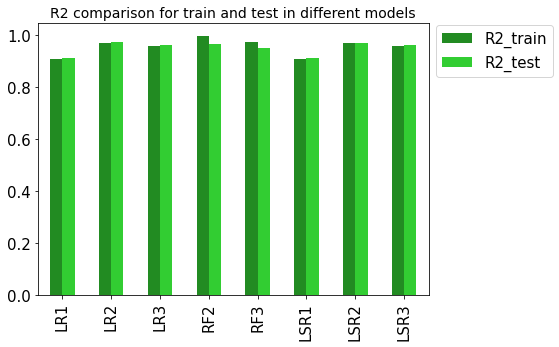

In [84]:
reg_metrics = reg_metrics.set_index('Type')
ax = reg_metrics[['R2_train', 'R2_test']].plot(kind='bar', figsize=(7, 5), color = ['Forestgreen', 'Limegreen'] )
ax.set_title('R2 comparison for train and test in different models', fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1.02)); 

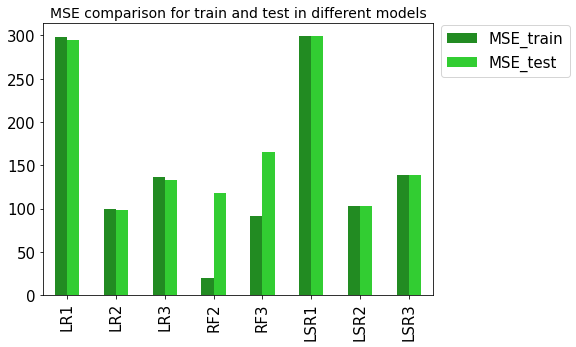

In [85]:
ax = reg_metrics[['MSE_train', 'MSE_test']].plot(kind='bar', figsize=(7, 5), color = ['Forestgreen', 'Limegreen'] )
ax.set_title('MSE comparison for train and test in different models', fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1.02)); 

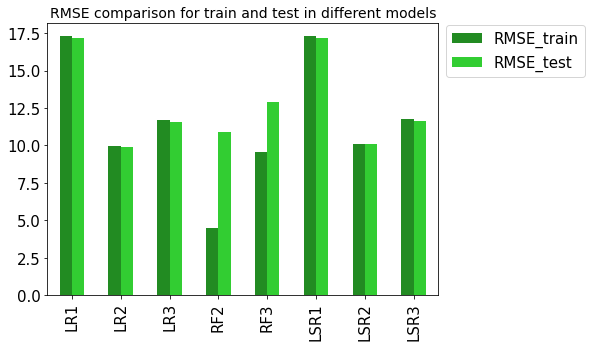

In [86]:
ax = reg_metrics[['RMSE_train', 'RMSE_test']].plot(kind='bar', figsize=(7, 5), color = ['Forestgreen', 'Limegreen'] )
ax.set_title('RMSE comparison for train and test in different models', fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1.02)); 

<u>**CONCLUSIONS**<u>

-We can see a big difference between train and test model MSE in the Random Forest Regression. This may indicate overfitting in the model.


<u>R2 score<u>
    
    
-similar for both train and test in all the models.
    
    
-almost identical in simple linear regression and lasso regression but a tiny bit better in simple linear regression.
    
    
-super high in random forest regression.
    

<u>MSE<u>
    
-similar for both train and test except in random forest that is much lower in the train model.
    
-lower in Random Forest than in the other 2 models because RF minimize errors much more than Simple Linear Regression.

<u>*Exercice 3*<u>

*Entrena’ls utilitzant els diferents paràmetres que admeten.*

For this exercice we will only use the second group of features of the previous models (Month, DayOfWeek, DepTime, ActualElapsedTime, Distance, AirTime, DepDelay, TaxiIn, TaxiOut) because it is the one which got better results in the three regression models.

<u>**Linear Regression**<u>

In [87]:
LinearRegression().get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [88]:
lin_reg2.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [89]:
#dictionary of search space
space = dict()
space['copy_X'] = [True, False]
space['fit_intercept'] = [True, False]
space['positive'] = [True, False]

search = GridSearchCV(lin_reg2, space)

result = search.fit(X2_train, y2_train)

print('Best Hyperparameters:', result.best_params_)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [90]:
lin_reg2_adj = LinearRegression(fit_intercept=False, positive=True).fit(X2_train, y2_train)

In [91]:
lin_reg2_adj_y_pred = lin_reg2_adj.predict(X2_train)
lin_reg2_adj_y_pred_test = lin_reg2_adj.predict(X2_test)

In [92]:
mse_lin2_adj = mean_squared_error(y2_train, lin_reg2_adj_y_pred)
print("Mean squared error of the linear regression model train subset:", mse_lin2_adj)

Mean squared error of the linear regression model train subset: 162.8320470854108


In [93]:
mse2_lin2_adj = mean_squared_error(y2_test, lin_reg2_adj_y_pred_test)
print("Mean squared error of the linear regression model test subset:", mse2_lin2_adj)

Mean squared error of the linear regression model test subset: 158.92026883246345


In [94]:
r2_lin2_adj = r2_score(y2_train, lin_reg2_adj_y_pred)
print("R2 score of the linear regression model train subset:", r2_lin2_adj)

R2 score of the linear regression model train subset: 0.9495939703467938


In [95]:
r22_lin2_adj = r2_score(y2_test, lin_reg2_adj_y_pred_test)
print("R2 score of the linear regression model test subset:", r22_lin2_adj)

R2 score of the linear regression model test subset: 0.9508121482020793


In [96]:
rmse_lin2_adj = np.sqrt(mse_lin2_adj)
print("Root mean squared error of the linear regression model train subset:", rmse_lin2_adj)

Root mean squared error of the linear regression model train subset: 12.760566095805107


In [97]:
rmse2_lin2_adj = np.sqrt(mse2_lin2_adj)
print("Root mean squared error of the linear regression model test subset:", rmse2_lin2_adj)

Root mean squared error of the linear regression model test subset: 12.60635827003435


<u>**Random Forest Regression**<u>

In [98]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [99]:
rf_reg2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [100]:
#dictionary of search space
space = dict()
space['n_estimators'] = [10, 20]
space['max_depth'] = [None, 5]

search = GridSearchCV(rf_reg2, space)

result = search.fit(X2_train, y2_train)

print('Best Hyperparameters: ', result.best_params_)

Best Hyperparameters:  {'max_depth': None, 'n_estimators': 20}


In [101]:
rf_reg2_adj = RandomForestRegressor(n_estimators = 20, random_state = 0).fit(X2_train, y2_train)

In [102]:
rf_reg2_adj_y2_pred2 = rf_reg2_adj.predict(X2_train)
rf_reg2_adj_y2_pred2_test = rf_reg2_adj.predict(X2_test)

In [103]:
mse_rf2_adj = mean_squared_error(y2_train, rf_reg2_adj_y2_pred2)
print("Mean squared error of the linear regression model train subset:", mse_rf2_adj)

Mean squared error of the linear regression model train subset: 16.815152452689013


In [104]:
mse2_rf2_adj = mean_squared_error(y2_test, rf_reg2_adj_y2_pred2_test)
print("Mean squared error of the linear regression model test subset:", mse2_rf2_adj)

Mean squared error of the linear regression model test subset: 112.55371697305986


In [105]:
r2_rf2_adj = r2_score(y2_train, rf_reg2_adj_y2_pred2)
print("R2 score of the linear regression model train subset:", r2_rf2_adj)

R2 score of the linear regression model train subset: 0.9947947281366005


In [106]:
r22_rf2_adj = r2_score(y2_test, rf_reg2_adj_y2_pred2_test)
print("R2 score of the linear regression model test subset:", r22_rf2_adj)

R2 score of the linear regression model test subset: 0.9651631878649009


In [107]:
rmse_rf2_adj = np.sqrt(mse_rf2_adj)
print("Root mean squared error of the random forest regression model train subset:", rmse_rf2_adj)

Root mean squared error of the random forest regression model train subset: 4.10062829974737


In [108]:
rmse2_rf2_adj = np.sqrt(mse2_rf2_adj)
print("Root mean squared error of the random forest regression model test subset:", rmse2_rf2_adj)

Root mean squared error of the random forest regression model test subset: 10.609133657988284


<u>**Lasso Regression**<u>

In [109]:
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [110]:
lr_reg2.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [111]:
#dictionary of search space
space = dict()
space['alpha'] = [0, 1]
space['copy_X'] = [True, False]
space['fit_intercept'] = [True, False]
space['positive'] = [True, False]

search = GridSearchCV(lr_reg2, space)

result = search.fit(X2_train, y2_train)

print('Best Hyperparameters: ', result.best_params_)

Best Hyperparameters:  {'alpha': 0, 'copy_X': True, 'fit_intercept': True, 'positive': False}


In [112]:
lr_reg2_adj = Lasso(alpha=0, copy_X= True, fit_intercept= True, positive= False).fit(X2_train, y2_train)

In [113]:
lr_reg2_adj_y2_pred2 = lr_reg2_adj.predict(X2_train)
lr_reg2_adj_y2_pred2_test =lr_reg2_adj.predict(X2_test)

In [114]:
mse_lr2_adj = mean_squared_error(y2_train, lr_reg2_adj_y2_pred2)
print("Mean squared error of the linear regression model train subset:", mse_lr2_adj)

Mean squared error of the linear regression model train subset: 99.02733014933675


In [115]:
mse2_lr2_adj = mean_squared_error(y2_test, lr_reg2_adj_y2_pred2_test)
print("Mean squared error of the linear regression model test subset:", mse2_lr2_adj)

Mean squared error of the linear regression model test subset: 98.06195710984703


In [116]:
r2_lr2_adj = r2_score(y2_train, lr_reg2_adj_y2_pred2)
print("R2 score of the linear regression model train subset:", r2_lr2_adj)

R2 score of the linear regression model train subset: 0.9693452570956929


In [117]:
r22_lr2_adj = r2_score(y2_test, lr_reg2_adj_y2_pred2_test)
print("R2 score of the linear regression model test subset:", r22_lr2_adj)

R2 score of the linear regression model test subset: 0.9696485725277864


In [118]:
rmse_lr2_adj = np.sqrt(mse_lr2_adj)
print("Root mean squared error of the random forest regression model train subset:", rmse_lr2_adj)

Root mean squared error of the random forest regression model train subset: 9.951247667972934


In [119]:
rmse2_lr2_adj = np.sqrt(mse2_lr2_adj)
print("Root mean squared error of the random forest regression model test subset:", rmse2_lr2_adj)

Root mean squared error of the random forest regression model test subset: 9.902623748777241


In [122]:
reg_metrics_adj = reg_metrics.copy()
reg_metrics_adj 

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 1,LR1,298.514682,0.907592,17.277577,294.601215,0.908817,17.163951
1,Linear Regression 2,LR2,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
2,Linear Regression 3,LR3,136.845515,0.957638,11.698099,133.042444,0.958822,11.534403
3,Random Forest Regression 2,RF2,19.983542,0.993814,4.470295,117.995754,0.963479,10.862585
4,Random Forest Regression 3,RF3,90.836395,0.971881,9.530813,165.691967,0.948716,12.872139
5,Lasso Regression 1,LSR1,299.106635,0.907409,17.294700,299.106635,0.908640,17.180644
6,Lasso Regression 2,LSR2,102.377589,0.968308,10.118181,102.377589,0.968496,10.088946
7,Lasso Regression 3,LSR3,138.380693,0.957163,11.763532,138.380693,0.958349,11.600358


In [123]:
reg_metrics_adj.drop([0,2,4,5,7], axis=0, inplace=True)
reg_metrics_adj.reset_index(drop=True, inplace=True)
reg_metrics_adj

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 2,LR2,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
1,Random Forest Regression 2,RF2,19.983542,0.993814,4.470295,117.995754,0.963479,10.862585
2,Lasso Regression 2,LSR2,102.377589,0.968308,10.118181,102.377589,0.968496,10.088946


In [124]:
new_row = {'Model':'Linear Regression 2 Adj', 'Type': 'LR2Ad', 'MSE_train':mse_lin2_adj, 'R2_train':r2_lin2_adj, 
           'RMSE_train': rmse_lin2_adj, 'MSE_test': mse2_lin2_adj, 'R2_test': r22_lin2_adj, 'RMSE_test': rmse2_lin2_adj}
new_row2 = {'Model':'Random Forest Regression 2 Adj', 'Type': 'RF2Ad', 'MSE_train':mse_rf2_adj, 'R2_train':r2_rf2_adj, 
            'RMSE_train': rmse_rf2_adj, 'MSE_test': mse2_rf2_adj, 'R2_test': r22_rf2_adj, 'RMSE_test': rmse2_rf2_adj}
new_row3 = {'Model':'Lasso Regression 2 Adj', 'Type': 'LSR2Ad', 'MSE_train':mse_lr2_adj, 'R2_train':r2_lr2_adj, 
            'RMSE_train': rmse_lr2_adj, 'MSE_test': mse2_lr2_adj, 'R2_test': r22_lr2_adj, 'RMSE_test': rmse2_lr2_adj}


reg_metrics_adj = reg_metrics_adj.append(new_row, ignore_index=True)
reg_metrics_adj = reg_metrics_adj.append(new_row2, ignore_index=True)
reg_metrics_adj = reg_metrics_adj.append(new_row3, ignore_index=True)
reg_metrics_adj

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 2,LR2,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
1,Random Forest Regression 2,RF2,19.983542,0.993814,4.470295,117.995754,0.963479,10.862585
2,Lasso Regression 2,LSR2,102.377589,0.968308,10.118181,102.377589,0.968496,10.088946
3,Linear Regression 2 Adj,LR2Ad,162.832047,0.949594,12.760566,158.920269,0.950812,12.606358
4,Random Forest Regression 2 Adj,RF2Ad,16.815152,0.994795,4.100628,112.553717,0.965163,10.609134
5,Lasso Regression 2 Adj,LSR2Ad,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624


In [125]:
reg_metrics_adj = reg_metrics_adj.reindex([0,3,1,4,2,5])
reg_metrics_adj.reset_index(drop=True, inplace=True)
reg_metrics_adj

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 2,LR2,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
1,Linear Regression 2 Adj,LR2Ad,162.832047,0.949594,12.760566,158.920269,0.950812,12.606358
2,Random Forest Regression 2,RF2,19.983542,0.993814,4.470295,117.995754,0.963479,10.862585
3,Random Forest Regression 2 Adj,RF2Ad,16.815152,0.994795,4.100628,112.553717,0.965163,10.609134
4,Lasso Regression 2,LSR2,102.377589,0.968308,10.118181,102.377589,0.968496,10.088946
5,Lasso Regression 2 Adj,LSR2Ad,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624


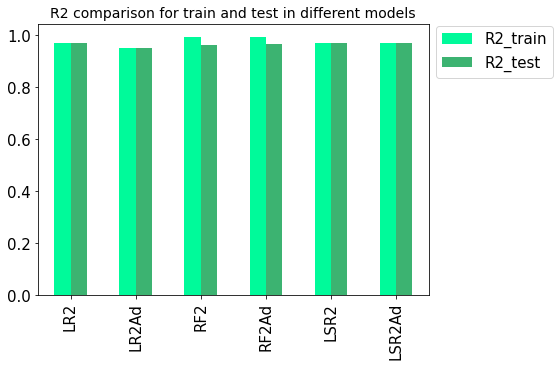

In [126]:
reg_metrics_adj2 = reg_metrics_adj.set_index('Type')
ax = reg_metrics_adj2[['R2_train', 'R2_test']].plot(kind='bar', figsize=(7, 5), color = ['Mediumspringgreen', 'Mediumseagreen'] )
ax.set_title('R2 comparison for train and test in different models', fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1.02)); 

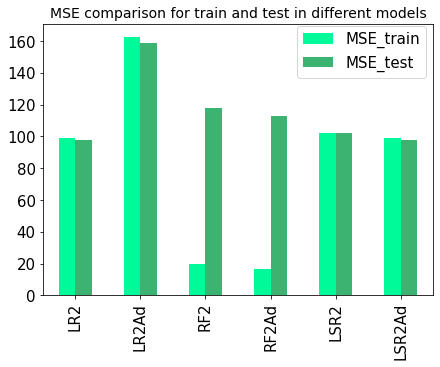

In [127]:
ax = reg_metrics_adj2[['MSE_train', 'MSE_test']].plot(kind='bar', figsize=(7, 5), color = ['Mediumspringgreen', 'Mediumseagreen'] )
ax.set_title('MSE comparison for train and test in different models', fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1.02)); 

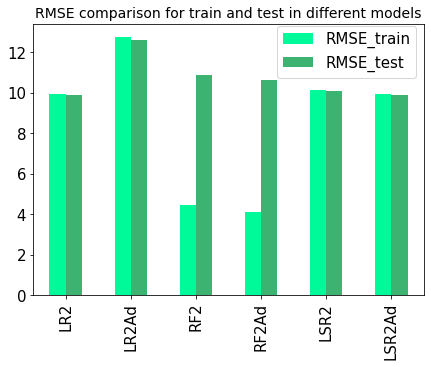

In [128]:
ax = reg_metrics_adj2[['RMSE_train', 'RMSE_test']].plot(kind='bar', figsize=(7, 5), color = ['Mediumspringgreen', 'Mediumseagreen'] )
ax.set_title('RMSE comparison for train and test in different models', fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1.02)); 

<u>**CONCLUSIONS**<u>

-Of course, the Linear Regression model didn't improve because we changed the hyperparameters to the ones which weren't the best just to see if it changed. The prediction decreased a little bit because of that change.

-Both Random Forest and Lasso improved a little bit with the optimization of the hyperparameters. It is not a huge improvement. If we could change the number of estimators of the Random Forest regression to 100 maybe we could see a higher improvement but it took too much time and I couldn't perform it.


<u>Exercice 4<u>

*Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)*

<u>**Linear Regression**<u>

In [129]:
r2_cv_linreg = cross_val_score(LinearRegression(), X2, y2, scoring = 'r2')
mse_cv_linreg = cross_val_score(LinearRegression(), X2, y2, scoring = 'neg_mean_squared_error')
print(abs(np.mean(mse_cv_linreg)).round(2), round(r2_cv_linreg.mean(),4))

99.82 0.9687


<u>**Random Forest Regression**<u>

In [130]:
r2_cv_rf = cross_val_score(RandomForestRegressor(n_estimators = 20, random_state = 1), X2, y2, scoring = 'r2')

In [131]:
mse_cv_rf = cross_val_score(RandomForestRegressor(n_estimators = 20, random_state = 1), X2, y2, scoring = 'neg_mean_squared_error')

In [132]:
print(abs(np.mean(mse_cv_rf)).round(2), round(r2_cv_rf.mean(),4))

112.23 0.965


<u>**Lasso Regression**<u>

In [133]:
r2_cv_lsreg = cross_val_score(Lasso(), X2, y2, scoring = 'r2')
mse_cv_lsreg = cross_val_score(Lasso(), X2, y2, scoring = 'neg_mean_squared_error')
print(abs(np.mean(mse_cv_lsreg)).round(2), round(r2_cv_lsreg.mean(),4))

103.16 0.9677


In [134]:
data_cv={'Model':['Linear Regression 2', 'Random Forest Regression 2', 'Lasso Regression 2'], 
      'Type':['LR2', 'RF2', 'LSR2'], 
      'MSE':[abs(np.mean(mse_cv_linreg)), abs(np.mean(mse_cv_rf)), abs(np.mean(mse_cv_lsreg))], 
      'R2':[r2_cv_linreg.mean(), r2_cv_rf.mean(), r2_cv_lsreg.mean()]}
reg_metrics_cv=pd.DataFrame(data_cv)
reg_metrics_cv

,Model,Type,MSE,R2
0,Linear Regression 2,LR2,99.819598,0.968659
1,Random Forest Regression 2,RF2,112.232029,0.965047
2,Lasso Regression 2,LSR2,103.155526,0.967682


In [135]:
reg_metrics_adj

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 2,LR2,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
1,Linear Regression 2 Adj,LR2Ad,162.832047,0.949594,12.760566,158.920269,0.950812,12.606358
2,Random Forest Regression 2,RF2,19.983542,0.993814,4.470295,117.995754,0.963479,10.862585
3,Random Forest Regression 2 Adj,RF2Ad,16.815152,0.994795,4.100628,112.553717,0.965163,10.609134
4,Lasso Regression 2,LSR2,102.377589,0.968308,10.118181,102.377589,0.968496,10.088946
5,Lasso Regression 2 Adj,LSR2Ad,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624


<u>**CONCLUSIONS**<u>

Comparing the results of the Cross Validation with the train/test approach results :

-MSE is a little higer for all the models (compared with train/test split) except in the Random Forest. It shows we had overfitting in the train/test approach.


-R2 is a little lower in Cross Validation but the difference is not worrying.

<u>Exercice 5<u>

*Realitza algun procés d’enginyeria de variables per millorar-ne la predicció*

We already had our dataset preprocessed with MinMaxScaler and Robust Scaler. We will use **MinMaxScaler** again for two more features.

In [148]:
normalized_features_mms = ['ArrTime', 'ActualElapsedTime'] 
scaler = MinMaxScaler()
delayed_flights_preprocessed[normalized_features_mms] = scaler.fit_transform(delayed_flights_preprocessed[normalized_features_mms])
delayed_flights_preprocessed

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AirTime,DepDelay,TaxiIn,TaxiOut
0,0.000000,20,1.000000,0.675281,1538,0.690704,1620,9E,0.075455,102.0,38.0,DTW,CID,431,38.0,0.0,0.0,0.0,0.0,-0.177215,0.463415,0.00,0.090909
1,1.000000,25,0.500000,0.606086,1408,0.671530,1533,9E,0.057273,85.0,39.0,DTW,AVP,398,39.0,0.0,0.0,0.0,0.0,-0.493671,0.560976,-1.00,0.909091
2,1.000000,17,0.333333,0.513130,1209,0.558983,1301,9E,0.105455,112.0,41.0,DTW,STL,440,0.0,0.0,18.0,0.0,23.0,0.037975,-0.024390,0.25,1.454545
3,0.454545,13,0.666667,0.732805,1705,0.876198,2029,9E,0.100000,144.0,34.0,JAN,DTW,777,0.0,0.0,0.0,0.0,34.0,0.202532,0.731707,1.25,-0.636364
4,1.000000,10,0.333333,0.438099,1020,0.481451,1140,9E,0.045455,80.0,16.0,MSP,OMA,282,16.0,0.0,0.0,0.0,0.0,-0.556962,0.195122,-1.00,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387348,0.272727,13,1.000000,0.673197,1610,0.732805,1805,YV,0.080909,115.0,-6.0,JAC,DEN,406,0.0,0.0,0.0,0.0,0.0,-0.025316,-0.439024,0.25,-0.545455
387349,0.090909,17,1.000000,0.804919,1835,0.847853,2001,YV,0.153636,206.0,34.0,ATL,DEN,1199,0.0,0.0,0.0,0.0,34.0,0.898734,0.804878,0.50,0.000000
387350,0.090909,13,0.333333,0.685286,1601,0.841601,1930,YV,0.128182,149.0,50.0,PHX,IAH,1009,50.0,0.0,0.0,0.0,0.0,0.518987,0.487805,0.50,0.181818
387351,0.545455,15,0.166667,0.479366,1052,0.604835,1407,YV,0.097273,135.0,45.0,ORD,PWM,900,45.0,0.0,0.0,0.0,0.0,0.151899,0.853659,-0.75,0.181818


We check the outliers of some other features to determine wether perform **Robust Scaler** or not.

In [161]:
col_robust = ['Distance', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay']

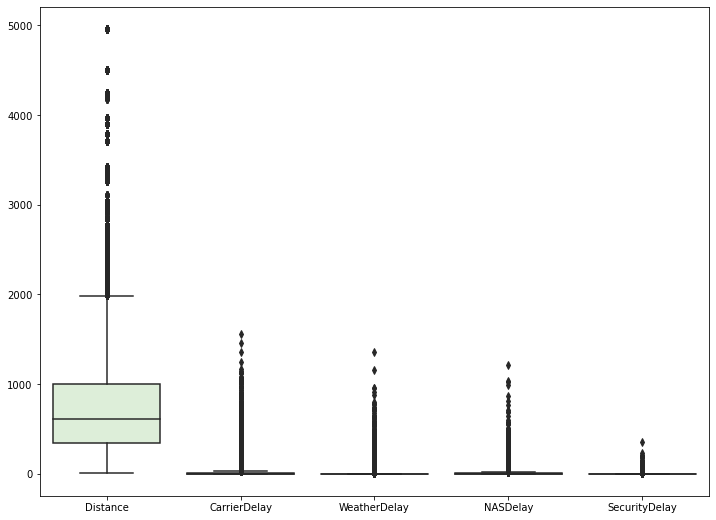

In [162]:
plt.figure(figsize=(12,9))
sns.boxplot(data = delayed_flights_preprocessed[col_robust], palette='Greens'); 

In [ ]:
col_robust = ['Distance', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay']

In [163]:
scaler = RobustScaler()

delayed_flights_preprocessed[col_robust] = scaler.fit_transform(delayed_flights_preprocessed[col_robust])
delayed_flights_preprocessed

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AirTime,DepDelay,TaxiIn,TaxiOut
0,0.000000,20,1.000000,0.675281,1538,0.690704,1620,9E,0.075455,102.0,38.0,DTW,CID,-0.265554,3.8,0.0,0.0,0.0,0.0,-0.177215,0.463415,0.00,0.090909
1,1.000000,25,0.500000,0.606086,1408,0.671530,1533,9E,0.057273,85.0,39.0,DTW,AVP,-0.315630,3.9,0.0,0.0,0.0,0.0,-0.493671,0.560976,-1.00,0.909091
2,1.000000,17,0.333333,0.513130,1209,0.558983,1301,9E,0.105455,112.0,41.0,DTW,STL,-0.251897,0.0,0.0,3.0,0.0,23.0,0.037975,-0.024390,0.25,1.454545
3,0.454545,13,0.666667,0.732805,1705,0.876198,2029,9E,0.100000,144.0,34.0,JAN,DTW,0.259484,0.0,0.0,0.0,0.0,34.0,0.202532,0.731707,1.25,-0.636364
4,1.000000,10,0.333333,0.438099,1020,0.481451,1140,9E,0.045455,80.0,16.0,MSP,OMA,-0.491654,1.6,0.0,0.0,0.0,0.0,-0.556962,0.195122,-1.00,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387348,0.272727,13,1.000000,0.673197,1610,0.732805,1805,YV,0.080909,115.0,-6.0,JAC,DEN,-0.303490,0.0,0.0,0.0,0.0,0.0,-0.025316,-0.439024,0.25,-0.545455
387349,0.090909,17,1.000000,0.804919,1835,0.847853,2001,YV,0.153636,206.0,34.0,ATL,DEN,0.899848,0.0,0.0,0.0,0.0,34.0,0.898734,0.804878,0.50,0.000000
387350,0.090909,13,0.333333,0.685286,1601,0.841601,1930,YV,0.128182,149.0,50.0,PHX,IAH,0.611533,5.0,0.0,0.0,0.0,0.0,0.518987,0.487805,0.50,0.181818
387351,0.545455,15,0.166667,0.479366,1052,0.604835,1407,YV,0.097273,135.0,45.0,ORD,PWM,0.446131,4.5,0.0,0.0,0.0,0.0,0.151899,0.853659,-0.75,0.181818


Once MinMaxScaler and RobustScaler have been performed, we create again the test and train subsets with the same features which gave us the better result (the second set of features used), and perform the regressions again to see if the results of the prediction improve.

In [177]:
#choose dependent (or target) variable 
y4 = delayed_flights_preprocessed['ArrDelay']
#choose independent variable 
X4 = delayed_flights_preprocessed[['Month','DayOfWeek','DepTime','ActualElapsedTime','Distance','AirTime','DepDelay','TaxiIn','TaxiOut']]

In [178]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

<u>Linear Regression<u>

In [179]:
lin_reg4 = LinearRegression()
lin_reg4.fit(X4_train, y4_train)

LinearRegression()

In [180]:
y_pred4 = lin_reg4.predict(X4_train)
y_pred4_test = lin_reg4.predict(X4_test)

In [181]:
mse_lin4 = mean_squared_error(y4_train, y_pred4)
print("Mean squared error of the linear regression model train subset:", mse_lin4)

Mean squared error of the linear regression model train subset: 99.02733014933676


In [182]:
mse2_lin4 = mean_squared_error(y4_test, y_pred4_test)
print("Mean squared error of the linear regression model test subset:", mse2_lin4)

Mean squared error of the linear regression model test subset: 98.06195710984704


In [183]:
r2_lin4 = r2_score(y4_train, y_pred4)
print("R2 score of the linear regression model train subset:", r2_lin4)

R2 score of the linear regression model train subset: 0.9693452570956929


In [184]:
r22_lin4 = r2_score(y4_test, y_pred4_test)
print("R2 score of the linear regression model test subset:", r22_lin4)

R2 score of the linear regression model test subset: 0.9696485725277864


In [185]:
rmse_lin4 = np.sqrt(mse_lin4)

print("Root Mean Squared Error of the linear regression model train subset: {}".format(rmse_lin4))

Root Mean Squared Error of the linear regression model train subset: 9.951247667972934


In [186]:
rmse2_lin4 = np.sqrt(mse2_lin4)

print("Root Mean Squared Error of the linear regression model test subset: {}".format(rmse2_lin4))

Root Mean Squared Error of the linear regression model test subset: 9.902623748777243


<u>Random Forest Regression<u>

In [187]:
rf_reg4 = RandomForestRegressor(n_estimators=20,random_state=0)
rf_reg4.fit(X4_train, y4_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [192]:
y4_pred2 = rf_reg4.predict(X4_train)
y4_pred2_test = rf_reg4.predict(X4_test)

In [193]:
mse_rf4 = mean_squared_error(y4_train, y4_pred2)
print("Mean squared error of the random forest regression model train subset:", mse_rf4)

Mean squared error of the random forest regression model train subset: 16.815990697080032


In [194]:
mse2_rf4 = mean_squared_error(y4_test, y4_pred2_test)
print("Mean squared error of the random forest regression model test subset:", mse2_rf4)

Mean squared error of the random forest regression model test subset: 112.55324305753622


In [195]:
r2_rf4 = r2_score(y4_train, y4_pred2)
print("R2 score of the random forest regression model train subset:", r2_rf4)

R2 score of the random forest regression model train subset: 0.9947944686509994


In [196]:
r22_rf4 = r2_score(y4_test, y4_pred2_test)
print("R2 score of the random forest regression model test subset:", r22_rf4)

R2 score of the random forest regression model test subset: 0.9651633345478049


In [197]:
rmse_rf4 = np.sqrt(mse_rf4)

print("Root Mean Squared Error of the random forest regression model train subset: {}".format(rmse_rf4))

Root Mean Squared Error of the random forest regression model train subset: 4.1007305077364


In [198]:
rmse2_rf4 = np.sqrt(mse2_rf4)

print("Root Mean Squared Error of the random forest regression model test subset: {}".format(rmse2_rf4))

Root Mean Squared Error of the random forest regression model test subset: 10.609111322704472


<u>Lasso Regression<u>

In [199]:
#Create an instance of Lasso Regression implementation
lr_reg4 = Lasso(alpha=1.0)
#Fit the Lasso model
lr_reg4.fit(X4_train, y4_train)

Lasso()

In [200]:
y4_pred2 = lr_reg4.predict(X4_train)
y4_pred2_test = lr_reg4.predict(X4_test)

In [201]:
mse_lsr4 = mean_squared_error(y4_train, y4_pred2)
print("Mean squared error of the lasso regression model train subset:", mse_lsr4)

Mean squared error of the lasso regression model train subset: 133.98726846870275


In [202]:
mse2_lsr4 = mean_squared_error(y4_test, y4_pred2_test)
print("Mean squared error of the lasso regression model test subset:", mse2_lsr4)

Mean squared error of the lasso regression model test subset: 130.07096346095466


In [204]:
r2_lsr4= r2_score(y4_train, y4_pred2)
print("R2 score of the lasso regression model train subset:", r2_lsr4)

R2 score of the lasso regression model train subset: 0.9585231141628837


In [205]:
r22_lsr4 = r2_score(y4_test, y4_pred2_test)
print("R2 score of the lasso regression model test subset:", r22_lsr4)

R2 score of the lasso regression model test subset: 0.9597413764717766


In [207]:
rmse_lsr4 = np.sqrt(mse_lsr4)

print("Root Mean Squared Error of the lasso regression model train subset: {}".format(rmse_lsr4))

Root Mean Squared Error of the lasso regression model train subset: 11.575286971332622


In [208]:
rmse2_lsr4 = np.sqrt(mse2_lsr4)

print("Root Mean Squared Error of the lasso regression model test subset: {}".format(rmse2_lsr4))

Root Mean Squared Error of the lasso regression model test subset: 11.404865780049963


In [221]:
reg_metrics_adj_eng = reg_metrics_adj.copy()
reg_metrics_adj_eng

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 2,LR2,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
1,Linear Regression 2 Adj,LR2Ad,162.832047,0.949594,12.760566,158.920269,0.950812,12.606358
2,Random Forest Regression 2,RF2,19.983542,0.993814,4.470295,117.995754,0.963479,10.862585
3,Random Forest Regression 2 Adj,RF2Ad,16.815152,0.994795,4.100628,112.553717,0.965163,10.609134
4,Lasso Regression 2,LSR2,102.377589,0.968308,10.118181,102.377589,0.968496,10.088946
5,Lasso Regression 2 Adj,LSR2Ad,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624


In [222]:
new_row4 = {'Model':'Linear Regression 2 Eng', 'Type': 'LR2En', 'MSE_train':mse_lin4, 'R2_train':r2_lin4, 
           'RMSE_train': rmse_lin4, 'MSE_test': mse2_lin4, 'R2_test': r22_lin4, 'RMSE_test': rmse2_lin4}
new_row5 = {'Model':'Random Forest Regression 2 Eng', 'Type': 'RF2En', 'MSE_train':mse_rf4, 'R2_train':r2_rf4, 
            'RMSE_train': rmse_rf4, 'MSE_test': mse2_rf4, 'R2_test': r22_rf4, 'RMSE_test': rmse2_rf4}
new_row6 = {'Model':'Lasso Regression 2 Eng', 'Type': 'LSR2En', 'MSE_train':mse_lsr4, 'R2_train':r2_lsr4, 
            'RMSE_train': rmse_lsr4, 'MSE_test': mse2_lsr4, 'R2_test': r22_lsr4, 'RMSE_test': rmse2_lsr4}


reg_metrics_adj_eng = reg_metrics_adj_eng.append(new_row4, ignore_index=True)
reg_metrics_adj_eng = reg_metrics_adj_eng.append(new_row5, ignore_index=True)
reg_metrics_adj_eng = reg_metrics_adj_eng.append(new_row6, ignore_index=True)
reg_metrics_adj_eng

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 2,LR2,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
1,Linear Regression 2 Adj,LR2Ad,162.832047,0.949594,12.760566,158.920269,0.950812,12.606358
2,Random Forest Regression 2,RF2,19.983542,0.993814,4.470295,117.995754,0.963479,10.862585
3,Random Forest Regression 2 Adj,RF2Ad,16.815152,0.994795,4.100628,112.553717,0.965163,10.609134
4,Lasso Regression 2,LSR2,102.377589,0.968308,10.118181,102.377589,0.968496,10.088946
5,Lasso Regression 2 Adj,LSR2Ad,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
6,Linear Regression 2 Eng,LR2En,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
7,Random Forest Regression 2 Eng,RF2En,16.815991,0.994794,4.100731,112.553243,0.965163,10.609111
8,Lasso Regression 2 Eng,LSR2En,133.987268,0.958523,11.575287,130.070963,0.959741,11.404866


In [223]:
reg_metrics_adj_eng = reg_metrics_adj_eng.reindex([0,1,6,2,3,7,4,5,8])
reg_metrics_adj_eng.reset_index(drop=True, inplace=True)
reg_metrics_adj_eng

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 2,LR2,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
1,Linear Regression 2 Adj,LR2Ad,162.832047,0.949594,12.760566,158.920269,0.950812,12.606358
2,Linear Regression 2 Eng,LR2En,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
3,Random Forest Regression 2,RF2,19.983542,0.993814,4.470295,117.995754,0.963479,10.862585
4,Random Forest Regression 2 Adj,RF2Ad,16.815152,0.994795,4.100628,112.553717,0.965163,10.609134
5,Random Forest Regression 2 Eng,RF2En,16.815991,0.994794,4.100731,112.553243,0.965163,10.609111
6,Lasso Regression 2,LSR2,102.377589,0.968308,10.118181,102.377589,0.968496,10.088946
7,Lasso Regression 2 Adj,LSR2Ad,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
8,Lasso Regression 2 Eng,LSR2En,133.987268,0.958523,11.575287,130.070963,0.959741,11.404866


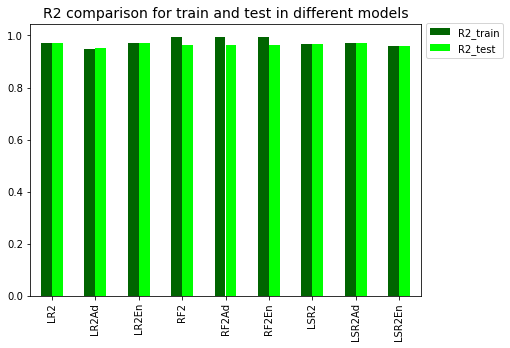

In [225]:
reg_metrics_adj_eng2 = reg_metrics_adj_eng.set_index('Type')
ax = reg_metrics_adj_eng2[['R2_train', 'R2_test']].plot(kind='bar', figsize=(7, 5), color = ['Darkgreen', 'Lime'] )
ax.set_title('R2 comparison for train and test in different models', fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1.02)); 

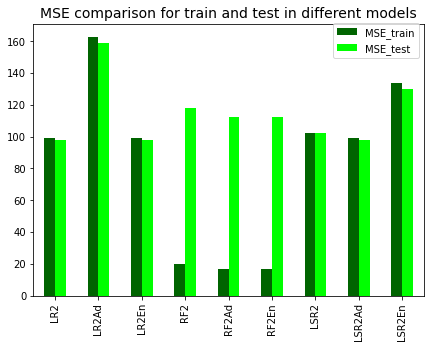

In [226]:
ax = reg_metrics_adj_eng2[['MSE_train', 'MSE_test']].plot(kind='bar', figsize=(7, 5), color = ['Darkgreen', 'Lime'] )
ax.set_title('MSE comparison for train and test in different models', fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1.02)); 

<u>**CONCLUSIONS**<U>

-With the new feature engineering we improved a little bit in the Random Forest, but since we know it has overfitting it is not the best model. Lasso Regression worsened a little bit and Linear Regression stayed the same. 

-The differences (both the improvements and decreasements) are very light.

<u>Exercice 6<u>

*No utilitzis la variable DepDelay a l’hora de fer prediccions*

In [233]:
#choose dependent (or target) variable 
y5 = delayed_flights_preprocessed['ArrDelay']
#choose independent variable 
X5 = delayed_flights_preprocessed[['Month','DayOfWeek','DepTime','ActualElapsedTime','Distance','AirTime','TaxiIn','TaxiOut', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay']]

In [234]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=0)

<u>Linear Regression<u>

In [235]:
lin_reg5 = LinearRegression()
lin_reg5.fit(X5_train, y5_train)

LinearRegression()

In [236]:
y_pred5 = lin_reg5.predict(X5_train)
y_pred5_test = lin_reg5.predict(X5_test)

In [237]:
mse_lin5 = mean_squared_error(y5_train, y_pred5)
print("Mean squared error of the linear regression model train subset:", mse_lin5)

Mean squared error of the linear regression model train subset: 1218.5256950239816


In [238]:
mse2_lin5 = mean_squared_error(y5_test, y_pred5_test)
print("Mean squared error of the linear regression model test subset:", mse2_lin5)

Mean squared error of the linear regression model test subset: 1201.7968666962615


In [239]:
r2_lin5 = r2_score(y5_train, y_pred5)
print("R2 score of the linear regression model train subset:", r2_lin5)

R2 score of the linear regression model train subset: 0.622795122852229


In [240]:
r22_lin5 = r2_score(y5_test, y_pred5_test)
print("R2 score of the linear regression model test subset:", r22_lin5)

R2 score of the linear regression model test subset: 0.628028528994121


In [242]:
rmse_lin5 = np.sqrt(mse_lin5)

print("Root Mean Squared Error of the linear regression model train subset: {}".format(rmse_lin5))

Root Mean Squared Error of the linear regression model train subset: 34.907387399001685


In [241]:
rmse2_lin5 = np.sqrt(mse2_lin5)

print("Root Mean Squared Error of the linear regression model test subset: {}".format(rmse2_lin5))

Root Mean Squared Error of the linear regression model test subset: 34.66694198651305


Since the Linear Regression without the DepDelay feature performs quite badly, I will try another regression model: the Gradient Boost Regression and the Xtreme Gradient Boost regression. Let's check it.

<u>Gradient Boost Regression <u>

In [243]:
gb_reg5 = GradientBoostingRegressor(random_state=0).fit(X5_train, y5_train)

In [244]:
y_pred5 = gb_reg5.predict(X5_train)
y_pred5_test = gb_reg5.predict(X5_test)

In [245]:
mse_gb5 = mean_squared_error(y5_train, y_pred5)
print("Mean squared error of the gradient boost regression model train subset:", mse_gb5)

Mean squared error of the linear regression model train subset: 1024.462902283453


In [246]:
mse2_gb5 = mean_squared_error(y5_test, y_pred5_test)
print("Mean squared error of the gradient boost  regression model test subset:", mse2_gb5)

Mean squared error of the linear regression model test subset: 1019.5506483748834


In [247]:
r2_gb5 = r2_score(y5_train, y_pred5)
print("R2 score of the gradient boost regression model train subset:", r2_gb5)

R2 score of the gradient boost  regression model train subset: 0.6828688924851325


In [248]:
r22_gb5 = r2_score(y5_test, y_pred5_test)
print("R2 score of the gradient boost regression model test subset:", r22_gb5)

R2 score of the gradient boost regression model test subset: 0.6844360599112362


In [249]:
rmse_gb5 = np.sqrt(mse_gb5)

print("Root Mean Squared Error of the gradient boost regression model train subset: {}".format(rmse_gb5))

Root Mean Squared Error of the gradient boost regression model train subset: 32.00723203095596


In [251]:
rmse2_gb5 = np.sqrt(mse2_gb5)

print("Root Mean Squared Error of the gradient boost regression model test subset: {}".format(rmse2_gb5))

Root Mean Squared Error of the gradient boost regression model test subset: 31.930403197812637


<u>Xtreme Gradient Boost Regression <u>

In [260]:
regressor = XGBRegressor()
xgb_reg5 = regressor.fit(X5_train, y5_train)

In [261]:
y_pred5 = xgb_reg5.predict(X5_train)
y_pred5_test = xgb_reg5.predict(X5_test)

In [267]:
mse_xgb5 = mean_squared_error(y5_train, y_pred5)
print("Mean squared error of the xtreme gradient boost regression model train subset:", mse_xgb5)

Mean squared error of the xtreme gradient boost regression model train subset: 849.5699171328886


In [268]:
mse2_xgb5 = mean_squared_error(y5_test, y_pred5_test)
print("Mean squared error of the xtreme gradient boost  regression model test subset:", mse2_xgb5)

Mean squared error of the xtreme gradient boost  regression model test subset: 931.1449782177114


In [269]:
r2_xgb5 = r2_score(y5_train, y_pred5)
print("R2 score of the xtreme gradient boost regression model train subset:", r2_xgb5)

R2 score of the xtreme gradient boost regression model train subset: 0.7370084869533701


In [270]:
r22_xgb5 = r2_score(y5_test, y_pred5_test)
print("R2 score of the xtreme gradient boost regression model test subset:", r22_xgb5)

R2 score of the xtreme gradient boost regression model test subset: 0.7117987433104891


In [271]:
rmse_xgb5 = np.sqrt(mse_xgb5)

print("Root Mean Squared Error of the xtreme gradient boost regression model train subset: {}".format(rmse_xgb5))

Root Mean Squared Error of the xtreme gradient boost regression model train subset: 29.147382680660858


In [272]:
rmse2_xgb5 = np.sqrt(mse2_xgb5)

print("Root Mean Squared Error of the xtreme gradient boost regression model test subset: {}".format(rmse2_xgb5))

Root Mean Squared Error of the xtreme gradient boost regression model test subset: 30.514668246889254


In [274]:
reg_metrics_adj_eng_fin = reg_metrics_adj_eng.copy()
reg_metrics_adj_eng_fin

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 2,LR2,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
1,Linear Regression 2 Adj,LR2Ad,162.832047,0.949594,12.760566,158.920269,0.950812,12.606358
2,Linear Regression 2 Eng,LR2En,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
3,Random Forest Regression 2,RF2,19.983542,0.993814,4.470295,117.995754,0.963479,10.862585
4,Random Forest Regression 2 Adj,RF2Ad,16.815152,0.994795,4.100628,112.553717,0.965163,10.609134
5,Random Forest Regression 2 Eng,RF2En,16.815991,0.994794,4.100731,112.553243,0.965163,10.609111
6,Lasso Regression 2,LSR2,102.377589,0.968308,10.118181,102.377589,0.968496,10.088946
7,Lasso Regression 2 Adj,LSR2Ad,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
8,Lasso Regression 2 Eng,LSR2En,133.987268,0.958523,11.575287,130.070963,0.959741,11.404866


In [278]:
reg_metrics_adj_eng_fin.drop([1,3,4,5,6,7,8], axis=0, inplace=True)
reg_metrics_adj_eng_fin

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 2,LR2,99.02733,0.969345,9.951248,98.061957,0.969649,9.902624
2,Linear Regression 2 Eng,LR2En,99.02733,0.969345,9.951248,98.061957,0.969649,9.902624


In [279]:
new_row7 = {'Model':'Linear Regression 5', 'Type': 'LR5', 'MSE_train':mse_lin5, 'R2_train':r2_lin5, 
           'RMSE_train': rmse_lin5, 'MSE_test': mse2_lin5, 'R2_test': r22_lin5, 'RMSE_test': rmse2_lin5}
new_row8 = {'Model':'Gradient Boost Regression 5', 'Type': 'GB5', 'MSE_train':mse_gb5, 'R2_train':r2_gb5, 
            'RMSE_train': rmse_gb5, 'MSE_test': mse2_gb5, 'R2_test': r22_gb5, 'RMSE_test': rmse2_gb5}
new_row9 = {'Model':'Xtreme Gradient Boost Regression 5', 'Type': 'XGB5', 'MSE_train':mse_xgb5, 'R2_train':r2_xgb5, 
            'RMSE_train': rmse_lsr4, 'MSE_test': mse2_xgb5, 'R2_test': r22_xgb5, 'RMSE_test': rmse2_xgb5}


reg_metrics_adj_eng_fin = reg_metrics_adj_eng_fin.append(new_row7, ignore_index=True)
reg_metrics_adj_eng_fin = reg_metrics_adj_eng_fin.append(new_row8, ignore_index=True)
reg_metrics_adj_eng_fin = reg_metrics_adj_eng_fin.append(new_row9, ignore_index=True)
reg_metrics_adj_eng_fin

,Model,Type,MSE_train,R2_train,RMSE_train,MSE_test,R2_test,RMSE_test
0,Linear Regression 2,LR2,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
1,Linear Regression 2 Eng,LR2En,99.027330,0.969345,9.951248,98.061957,0.969649,9.902624
2,Linear Regression 5,LR5,1218.525695,0.622795,34.907387,1201.796867,0.628029,34.666942
3,Gradient Boost Regression 5,GB5,1024.462902,0.682869,32.007232,1019.550648,0.684436,31.930403
4,Xtreme Gradient Boost Regression 5,XGB5,849.569917,0.737008,11.575287,931.144978,0.711799,30.514668


We drop the Linear Regression Adjusted because it was a test and the results were worse than before. We also drop the Random Forest because we had overfitting and the Lasso Regression because it was worse than the Linear Regression. 

The Xtreme Gradient Boost Regression is the best model but, without the Dep Delay feature, it has worse results than the Linear Regression with Dep Delay.